<a href="https://colab.research.google.com/github/vitorquintella/personal-ml-study/blob/main/Dicas_uteis_e_fun%C3%A7%C3%B5es_r%C3%A1pidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Manipulação

In [ ]:
import pandas as pd
import numpy as np

## Ler um csv direto de um site


In [ ]:
# Ler um csv direto de um site
uci_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
df_red= pd.read_csv(uci_url + 'winequality-red.csv', sep =';')
df_white= pd.read_csv(uci_url + 'winequality-white.csv', sep =';')

## Inserir uma coluna condicional


In [ ]:
# Inserir uma coluna condicional
df_red['quality_class'] = (df_red['quality'] >= 7).astype(int)
df_white['quality_class'] = (df_white['quality'] >= 7).astype(int)

# Inserir uma coluna com valor fixo
df_red['is_red'] = 1
df_white['is_red'] = 0

# Mantaer apenas um valor
# df_red['quality_class'] = df_red['quality_class'].where(df_red['quality_class']>=0, other=np.NaN)

## Concatenar dataframes

In [ ]:
df = pd.concat([df_red,df_white], axis = 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,0


## Renomear colunas com lambda


In [ ]:
print(df.columns)

# Renomear colunas, Remove espaço from column names usando lambda
df = df.rename(columns=lambda x: x.replace(' ', '_'))

print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_class', 'is_red'],
      dtype='object')
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_class', 'is_red'],
      dtype='object')


# Análise inicial

In [ ]:
#Verificação inicial de dadosm tipos e e nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_class         6497 non-null   int64  
 13  is_red                6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 761.4 KB


In [ ]:
# Descrisção com estatísticas básicas de cada coluna
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class,is_red
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.0,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82,0.2,0.25
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87,0.4,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.0,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00,0.0,0.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00,0.0,0.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00,0.0,0.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,1.0,1.00


# Seaborn, matplotlib e vizualização

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Multiplos plots em um plot (simples)

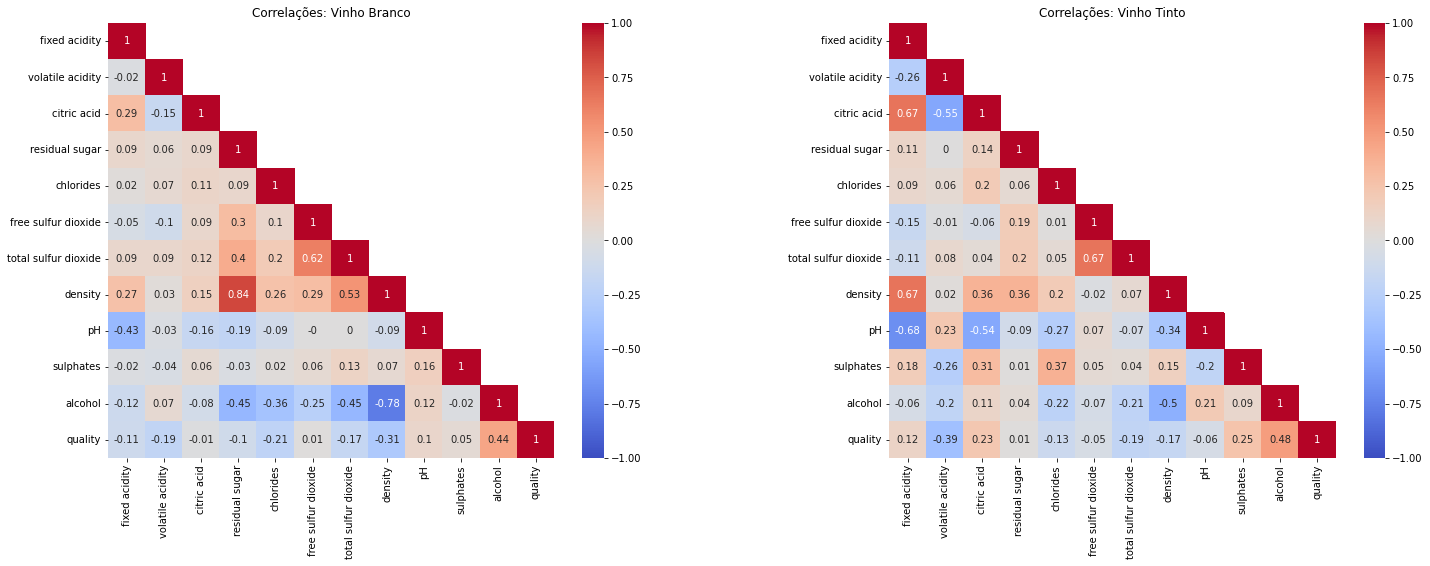

In [ ]:
fig = plt.figure(figsize=(24,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
mask = np.zeros_like(df_white.iloc[:, :12].corr())
mask[np.triu_indices_from(mask, k = 1)] = True
g = sns.heatmap(df_white.iloc[:, :12].corr().round(2),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm", mask = mask)
plt.title("Correlações: Vinho Branco")

ax = fig.add_subplot(1, 2, 2)
mask = np.zeros_like(df_red.iloc[:, :12].corr())
mask[np.triu_indices_from(mask, k = 1)] = True
g = sns.heatmap(df_red.iloc[:, :12].corr().round(2),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm", mask = mask)
plt.title('Correlações: Vinho Tinto')

plt.show()

## Multiplos plots em um plot (loop)

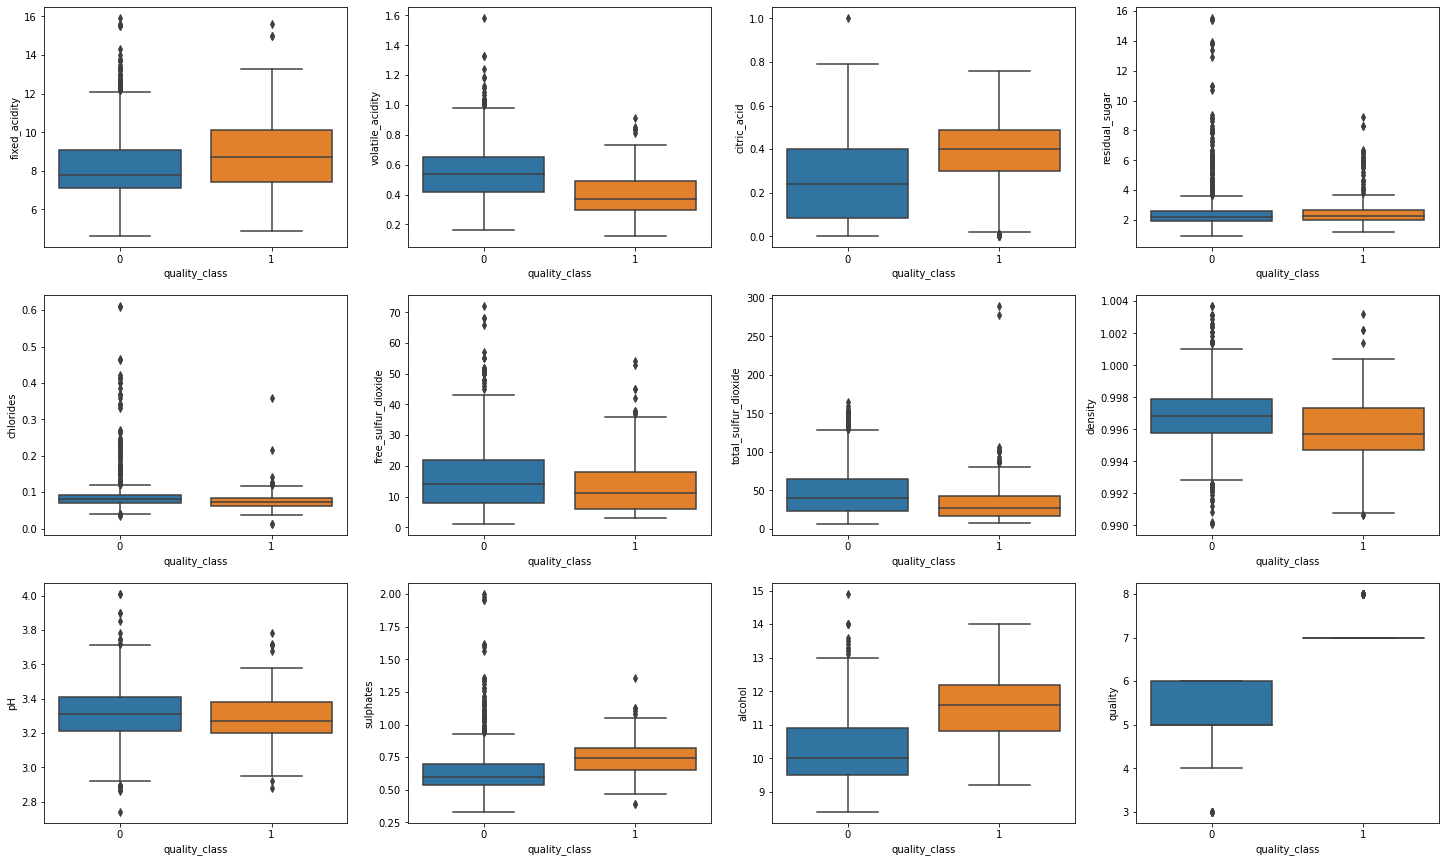

In [ ]:
# Multiplos plots em mesmo plot:

dims = (3, 4)
 
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in df.columns:
  if col == 'is_red' or col == 'quality_class':
    continue # Box plots cannot be used on indicator variables
  sns.boxplot(x=df['quality_class'], y=df[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

# Split, teste e treino

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Pode ser feito antes de selecionar variáveis
train, test = train_test_split(df, test_size =0.25, random_state=123, 
                               stratify=df[["quality_class"]])
X_train = train.drop(["quality_class"], axis=1)
X_test = test.drop(["quality_class"], axis=1)
y_train = train[["quality_class"]]
y_test = test[["quality_class"]]

y_test

In [ ]:
# Pode ser feito depois de selecionar variáveis
X = df.drop(columns=['quality', "quality_class"])
y = df[["quality_class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=123, stratify=y)
y_test